<h2>This program estimates the paramters of the logistic m growth model of Algae using least square method.</h2>
<h3>This is the project work of CM 3rd year/1st sem students (Sikkum Rai, Bishwas Adhikari, Allen Maharjan) </h3>

Specific Growth Rate= 0.03871303606923002
Carrying Capacity = 1.1990136591604286
Coefficient of Determination=  0.9514218597689353


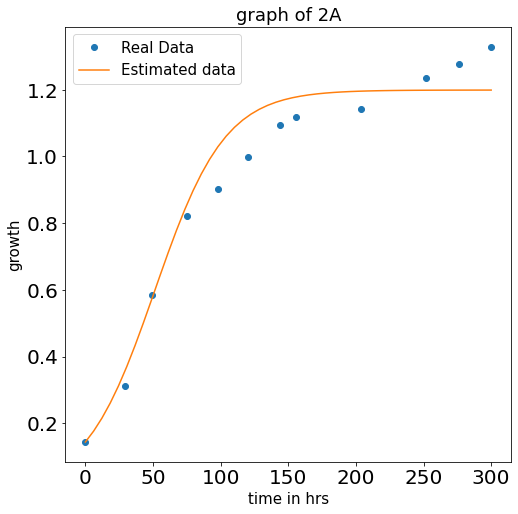

In [17]:
#importing packages for mathematical calculations and graph plotting

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


R,K,MU = [],[],[] #global variables for bargraph plotting

#Calculating Coefficient of Determination
def findr(conc,time,k,r):
    p0 = conc[0] #concentration at time 0
    fi,tot,reg,res = [],[],[],[]
    average = np.mean(conc)
    for i in range (0,len(time)):
        #solution oflogistic differential equation
        fi.append((p0*k)/(p0+(k-p0)*np.exp(-r*time[i])))
        tot.append((conc[i]-average)**2)
        
    for i in range(0,len(time)):
        reg.append((fi[i]-average)**2)
        res.append((conc[i]-fi[i])**2)
        
    SSreg = np.sum(reg) #Regression sum of squares
    SStot = np.sum(tot) #Total sum of square
    SSres = np.sum(res) #Residual sum of square
    Rsq = (SSreg/SStot) #Coefficient of determination
    MU.append(Rsq)
    print ('Coefficient of Determination= ',Rsq)
    

#Calculating p to plot the graph
def findp(conc,k,r,time,ratio,file_name):
    p0 = conc[0]
    p= []
    t = np.linspace(0,time[len(time)-1],50)
    for i in range (0, len(t)):
        p.append((p0*k)/(p0+(k-p0)*np.exp(-r*t[i]))) #using logistic model equation
        
    #function call
    findr(conc,time,k,r)
    plotting(t,p,conc,time,ratio,file_name)
    
#graph plot of given data and findings
def plotting(x,y,conc,time,ratio,file_name):
    plt.title("graph of {}".format(file_name))
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.plot(time,conc,'o',label = 'Real Data')
    plt.plot(x,y,label = 'Estimated data')
    plt.xlabel('time in hrs')
    plt.ylabel('growth')
    plt.legend()
    plt.show()
        
#calculation of specific growth rate and carryting capacity
def calculation(data,file_name):
    pt,ratio,xsq,xy = [],[],[],[] #initializing variables used for calculation
    time = (data['hour']) #time extracted from given data
    if (time[1]==1.23): #changing hrs into min
        time = time*24
    conc=(data['abs']) #concentration extrtacted from given data
    for i in range (1,len(time)):
        pt.append((conc[i]-conc[i-1])/(time[i]-time[i-1]))#using forward difference
    for i in range (0,(len(time)-1)):
        ratio.append(pt[i]/conc[i+1]) 
    xsq = np.power(conc,2)
    for i in range (0,(len(time)-1)):
        xy.append(conc[i+1]*ratio[i])
    sumx= np.sum(conc)
    sumy= np.sum(ratio)
    sumx2 = np.sum(xsq)
    sumy2 = np.sum(xy)
    a0 = ((sumy * sumx2) - (sumx * sumy2))/(((len(time)-1)*sumx2) - (sumx**2)) #specific growth rate
    a1 = (((len(time)-1)*sumy2)-(sumx*sumy))/(((len(time)-1)*sumx2)-(sumx**2))
    print('Specific Growth Rate=',a0)
    
    #calculating carrying capacity
    k = -a0/a1
    print("Carrying Capacity =",k)
    R.append(a0)
    K.append(k)
    findp(conc,k,a0,time,ratio,file_name)
    

def main(file_name):
    
    #reading the content of the file using pandas
    data = pd.read_csv("{}.csv".format(file_name))
    calculation(data,file_name)
    
    
    
main("2A")

Specific Growth Rate= 0.028714551241224105
Carrying Capacity = 1.6993124274643896
Coefficient of Determination=  1.1459671861695584


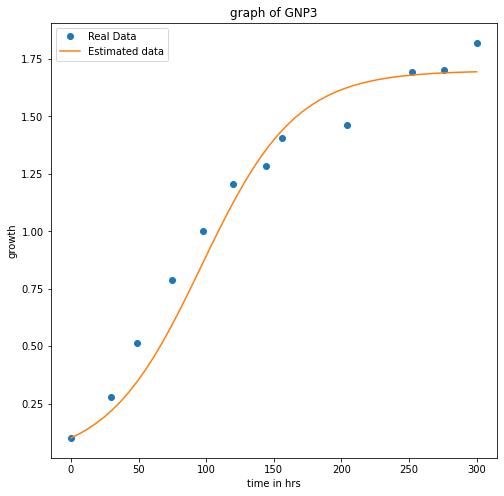

In [2]:
main('GNP3')

Specific Growth Rate= 0.026045933304813182
Carrying Capacity = 1.5604677425173252
Coefficient of Determination=  1.139867943827907


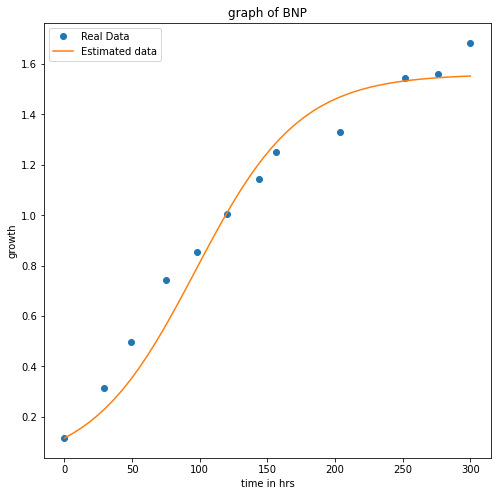

In [3]:
main('BNP')

Specific Growth Rate= 0.022269277873076112
Carrying Capacity = 2.197571741180314
Coefficient of Determination=  1.1520994005308671


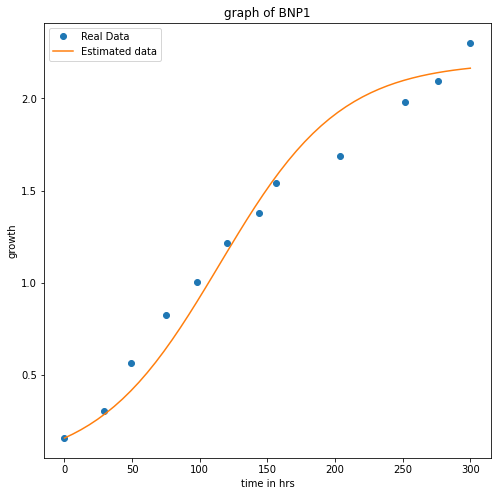

In [4]:
main('BNP1')

Specific Growth Rate= 0.05534854869883033
Carrying Capacity = 1.4012013745230458
Coefficient of Determination=  0.7339056944416096


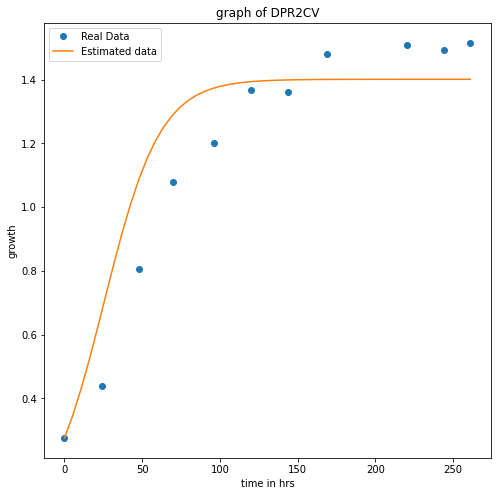

In [5]:
main('DPR2CV')

Specific Growth Rate= 0.022474924880501408
Carrying Capacity = 1.7263087982437764
Coefficient of Determination=  1.098044322746821


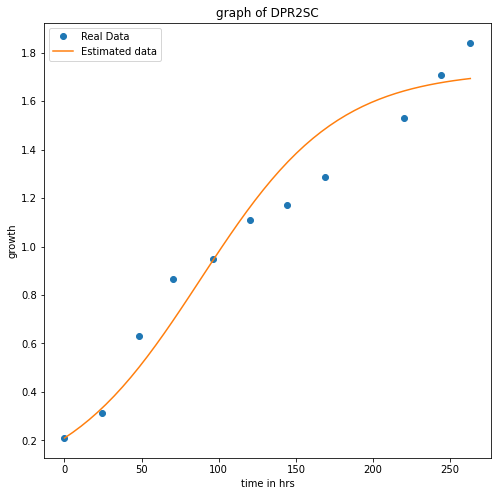

In [6]:
main('DPR2SC')

[1.1990136591604286, 1.6993124274643896, 1.5604677425173252, 2.197571741180314, 1.4012013745230458, 1.7263087982437764]


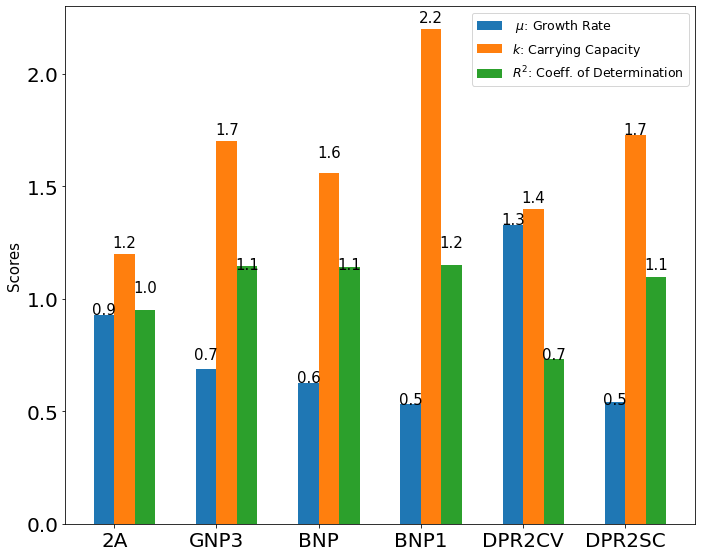

In [15]:
objects = ('2A','GNP3','BNP','BNP1','DPR2CV','DPR2SC')
y_pos = np.arange(len(objects))

# This cell plots the group bar diagram of specific growth Rate, carrying capacity,specific growth rate
MU1 = np.array(R)*24 # Growth rate calcualted per Day
labels = ['2A','GNP3','BNP','BNP1','DPR2CV','DPR2SC']
x = 1.5*np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
plt.rc('font', size=15) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
fig, ax = plt.subplots(1,1,figsize=(10,8))
rects1 = ax.bar(x - width/2, MU1, width,label=' $\mu$: Growth Rate')
rects2 = ax.bar(x + width/2, K, width, label='$k$: Carrying Capacity')
rects3 = ax.bar(x + 3*width/2, MU, width, label='$R^2$: Coeff. of Determination')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
# ax.set_title('Title to be given')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right', fontsize='small')
#ax.set_xlim(-1,7)
ax.set_ylim(0,2.3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        height = round(height,1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
